# Lesson 4 Batch Processing and Tracking

Congratulations, you've just completed an awesome image processing pipeline that takes an image and does something rather useful. You've tested it a few times and you're happy with the results. 

Now maybe you need to apply the same operation to 1000 images. Maybe you need to apply them to 20 datasets with slightly different parameters. Maybe you need to aggregate information across the results of each processed image to make your conclusions. These needs can be addressed by applying your pipeline with batch processing. In this lesson, you will learn:

1. Two batch processing strategies and their advantages & disadvantages
2. Cell tracking approach and measurements


## 4.1 Batch processing strategies (vertical and horizontal integration)

### 4.1.1 Project aim: batch processing of multiple images

In [15]:
data_folder = ('/Users/erezaei/Desktop/SU-Research/Ehsan_Mentoring/BIOS245-PythonWorkshop/Nov2019/ImagesAll')

import os
from skimage.io import imread
import matplotlib.pyplot as plt

os.chdir(data_folder)
listdir = os.listdir

files = [f for f in listdir(data_folder) if '.TIF' in f]
#print(files)

**Exercise 1:** You're at the point where you have the functions below. 

In [8]:
def loading(image_file_name):
    img = imread(image_file_name)
    return img

def preprocessing(image):
    process_image = None
    return process_image

def info_extraction(image):
    results = None
    return results

How might you apply the pipeline you developed to every image in a folder, saving the results in a list?

### 4.1.2 Strategy one: the vertical approach

#### A straightforward procedure that applies all processing steps to each image one at a time, from start to end.

In [16]:
results = []
for f in files:
    img = loading(f)
    processed = preprocessing(img)
    result = info_extraction(processed)
    results.append(result)

#### Example: counting cell numbers from 5 images

In [11]:
# define functions

from skimage.io import imread
def loading(image_file_name):
    img = imread(image_file_name)
    return img

import numpy as np
from scipy.ndimage.filters import median_filter
from skimage import filters
import skimage.morphology as sm
def preprocessing(image):
    # filtering
    filtered = median_filter(image, size=2) 
    # thresholding
    otsu_thresh = filters.threshold_otsu(filtered) 
    masked = filtered > otsu_thresh #smaller threshold than otsu      
    # morphology
    morph = sm.binary_opening(masked,sm.disk(3)) 
    return morph

from skimage.measure import label
from skimage.measure import regionprops
import matplotlib.pyplot as plt
def info_extraction(image):
    # labeling
    cell_labels = label(image)
    cell_number = np.amax(cell_labels)
    #plt.figure() 
    #plt.imshow(cell_labels)
    return cell_number 

In [90]:
# batch processing
import os
import re
import pandas as pd
%matplotlib inline
results = []
res=[]
for f in files:
    tes=f.split("_")[3].split(".")[0]
    tmp_res=int(re.sub("\D", "", tes))
    res.append(tmp_res)
    img = loading(f)
    img = img[0:int(img.shape[0]),:]
    processed = preprocessing(img)
    tmp_result = info_extraction(processed)
    results.append(tmp_result)
    
df = pd.DataFrame({'Image No.':res, '#ofCells': results})
df = df.sort_values(by=['Image No.'])
#print('Cell Numbers in Each Image:',results)

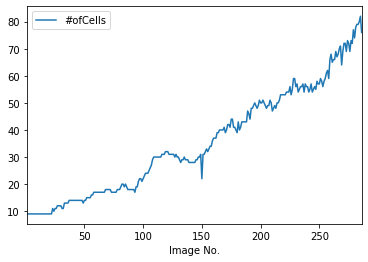

     Image No.  #ofCells
71           1         9
86           2         9
89           3         9
116          4         9
119          5         9
102          6         9
101          7         9
136          8         9
139          9         9
73          10         9
72          11         9
87          12         9
88          13         9
115         14         9
120         15         9
103         16         9
100         17         9
134         18         9
141         19         9
195         20         9
192         21         9
175         22         9


In [97]:
df.plot(kind='line',x='Image No.',y='#ofCells')
plt.show()
print(df[0:22])

In this vertical pipeline, we converted different steps as different functions. **The advantages of using predefined functions:** 
##### 1) Concise flow: clear main flow for coding, reading, and management; 
##### 2) No side effect: local parameter changes inside  the function won't affect the global parameters in the main flow; 
##### 3) Time saving: easily reused for other projects; 
##### 4) Reproducible:minimal input error and avoiding inconsistent operations. 

These are very important when processing large dataset with multiple steps, especially with many lines of codes.

**Exercise 2:**: understand the importance of predefined function
    
["imread" function: source codes](https://github.com/luispedro/imread/blob/master/imread/imread.py)

### 4.1.3 Strategy two: the horizontal approach
When you face a problem and want to debug suspicious functions, vertical approach may not be the best choice. 
Instead of applying all processing steps to each image one at a time, you can use the horizontal approach that applies one processing step to all images and then move to the next step. In this way, each processing step will serve as a seperate unit for testing and debugging.

In [98]:
images = []
processed = []
results = []

for f in files:
    images.append(loading(f))
    
for img in images:
    processed.append(preprocessing(img))
    
for proc in processed:
    results.append(info_extraction(proc))

print('Cell Numbers in Each Image:',results)

Cell Numbers in Each Image: [68, 72, 30, 24, 29, 17, 18, 21, 22, 17, 17, 28, 25, 30, 69, 70, 72, 67, 66, 27, 30, 17, 18, 17, 17, 18, 17, 30, 26, 59, 69, 69, 58, 73, 68, 24, 31, 17, 17, 14, 13, 17, 17, 31, 24, 65, 72, 57, 66, 73, 30, 30, 23, 17, 17, 18, 18, 17, 17, 22, 30, 31, 69, 66, 48, 48, 56, 49, 42, 40, 14, 9, 9, 9, 14, 40, 42, 51, 57, 47, 49, 49, 49, 39, 39, 34, 9, 9, 9, 9, 36, 40, 40, 49, 48, 53, 50, 31, 37, 44, 9, 9, 9, 9, 41, 37, 30, 51, 51, 59, 50, 50, 47, 44, 37, 9, 9, 12, 12, 9, 9, 39, 41, 43, 50, 50, 59, 54, 56, 53, 44, 43, 31, 29, 9, 10, 9, 12, 11, 9, 11, 9, 30, 32, 43, 46, 53, 57, 56, 55, 55, 43, 48, 29, 31, 40, 13, 12, 11, 11, 41, 22, 28, 48, 43, 53, 54, 57, 54, 41, 48, 40, 28, 33, 13, 9, 11, 14, 32, 28, 41, 49, 40, 54, 54, 50, 53, 56, 49, 39, 34, 28, 9, 13, 13, 9, 28, 33, 43, 50, 56, 53, 51, 80, 55, 56, 29, 31, 32, 14, 15, 19, 18, 18, 20, 15, 14, 31, 31, 30, 58, 56, 82, 57, 54, 72, 31, 28, 18, 14, 14, 17, 18, 19, 18, 14, 14, 18, 29, 30, 77, 55, 59, 76, 79, 64, 59, 54, 3

**Exercise 3:**: adjust the "preprocessing" function to get better cell masks 

In [99]:
def preprocessing(image):
    filtered = median_filter(image, size=2) 
    otsu_thresh = filters.threshold_otsu(filtered) 
    masked = filtered > otsu_thresh*0.85
    morph = sm.binary_opening(masked,sm.disk(3)) 
    return morph

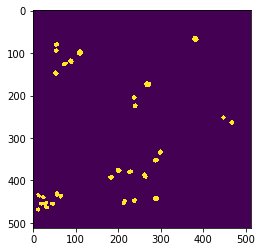

In [100]:
processed = []
for img in images:
    processed.append(preprocessing(img))

plt.imshow(processed[2])

So now rather than completing your pipline "vertically", from start to finish, top to bottom, you are completing your pipeline "horizontally", applying each stage across the board in sequence.

In fact, when you've made your code modular with little functions, Python tries to support this approach with _functional programming tools_. We'll talk about one of the especially useful ones:

- `map(function, iterable)`. Applies `function` to each element in `iterable` (i.e. anything you can loop through) and gives you a new list with the results.

In [101]:
images = map(loading, files)
processed = map(preprocessing,images)
results = map(info_extraction, processed)

print('Cell Numbers in Each Image:',list(results))

Cell Numbers in Each Image: [1, 1, 26, 24, 28, 16, 18, 21, 22, 17, 17, 29, 23, 29, 1, 1, 1, 1, 1, 26, 29, 17, 18, 16, 17, 18, 17, 29, 26, 1, 1, 1, 1, 1, 1, 21, 32, 17, 17, 14, 12, 17, 18, 30, 23, 1, 1, 1, 1, 1, 29, 31, 22, 16, 17, 18, 18, 17, 17, 22, 30, 30, 1, 1, 1, 1, 1, 1, 122, 96, 12, 9, 9, 9, 12, 177, 107, 1, 1, 1, 1, 1, 1, 35, 99, 34, 8, 9, 9, 9, 33, 125, 174, 1, 1, 1, 1, 28, 34, 44, 9, 9, 9, 9, 103, 31, 27, 1, 1, 1, 1, 1, 1, 14, 35, 8, 9, 12, 11, 9, 9, 33, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 31, 29, 9, 10, 9, 12, 11, 9, 11, 9, 30, 29, 79, 1, 1, 1, 1, 1, 1, 35, 1, 28, 31, 3, 12, 11, 11, 11, 2, 22, 28, 1, 25, 1, 1, 1, 1, 9, 1, 118, 28, 31, 11, 9, 11, 13, 30, 28, 135, 1, 34, 1, 1, 1, 1, 1, 1, 1, 31, 26, 9, 11, 12, 9, 26, 31, 8, 1, 1, 1, 1, 1, 1, 1, 29, 31, 31, 13, 15, 19, 17, 17, 19, 13, 14, 31, 30, 29, 1, 1, 1, 1, 1, 1, 28, 28, 18, 13, 14, 18, 19, 19, 17, 14, 14, 18, 27, 28, 1, 1, 1, 1, 1, 1, 1, 1, 29, 29, 15, 14, 18, 20, 19, 20, 20, 18, 13, 15, 28, 30, 1, 1, 1, 1, 1, 1, 1, 28, 27, 31, 

Now this looks like a pretty concise way to process a pipeline! But is it the best way?

### 4.1.4 Memory cost for batch processing


One thing to consider is that at the end of the program, `files`, `images`, `processed`, and `results` are all full arrays available to you in program memmory. This could be useful for debugging (e.g., check the intermediate results after preprocessing). It may also be useful when you need to aggregated across intermediate results.

But the downside of having all the intermediate information is that it may use a lot of memory, even out of memory in your computer.

**Exercise 4:** Not all approaches above are as memory intensive as the others. Which approach is the least offensive?

**Exercise 5:** in our lesson on loading an image we discussed how much memory an image can use up. If you are processing 1000 16-bit, 1024x1024 pixel images each with 3 channels, how much memory does the first line above use?

In [102]:
num_bytes = 1000 * 2 * 1024**2 * 3
print("{} Bytes".format(num_bytes))
print("{} GB".format(num_bytes / 1024.**3))

6291456000 Bytes
5.859375 GB


That's probably not going to go smoothly if you have a multi-stage pipeline. You could delete each stage as you go, keeping in memory only the last and current stage using `del` stagements, e.g. `del images`, but this can introduce bugs when you need some parameters later. For very large numbers of images, this strategy suffers.

In [ ]:
#processed = map(preprocessing,images)
#del images

#list(images)

#### A good way to design a pipeline is to draw out the pipes. 
Map out the dependencies between pieces of information so you can see where to break things into functions and figure out how much data you actually need to keep in memory. The example below is a workflow for processing a green structural channel and a red calcium fluorescence channel in a 60-frame time series of images. The goal is to find cells, make masks, and track the fluorescence intensities over time.

![Diagram of a pipeline](pipeline_diagrams.png "A typical pipeline diagram")

What are some observations we can make once we've drawn out this plan? We can see that loading raw images and preprocessing them can be done with one function, applied image-by-image, without saving the intermediate. However we need to stop after this and max project. We can then remove all of the green channel data from memory and work on the red channel, keeping only the cell location masks. We then apply the cell location masks to each image, one at a time, take out resulting total cell intensities and save them in an array.

Without doing this, we may have tried to load both channels at the beginning, which will double our memory consumption.

---------------------------------------------------------------------------------------------------------------------

# 4.2 Tracking objects / pipeline design

It is important to be able to order the various image processing tools you have learnt in an automated pipeline so you don't have to apply the same N transformations over and over again to your dataset of M images. Today you will learn how to build your very own image processing pipeline, along with some nifty video processing tools.

We will do this in the context of an image processing method known as "tracking". You already know how to identify separate objects in your images and measure their properties (position, size, intensity etc.). Now imagine you have a time-series of images (or a video...). Tracking is essentially the ability to identify the same object in your entire time-series consistently. We will also demonstrate how this process can fail, and what to watch out for when you are analyzing your own data.


In [106]:
%matplotlib inline
from moviepy import editor as mpy

vid_file_name =  ('/Users/erezaei/Desktop/SU-Research/Ehsan_Mentoring/BIOS245-PythonWorkshop/Nov2019/CellVideo.gif')
vid = mpy.VideoFileClip(vid_file_name)
mpy.ipython_display(vid, width=480)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4

Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [107]:
import numpy as np
from scipy.ndimage.filters import median_filter
from skimage import filters
import skimage.morphology as sm
def preprocessing(image):
    # filtering
    filtered = median_filter(image, size=2) 
    # thresholding
    otsu_thresh = filters.threshold_otsu(filtered) 
    masked = filtered > otsu_thresh-15 #smaller threshold than otsu      
    # morphology
    morph = sm.binary_erosion(masked,sm.disk(1)) 
    return morph

from skimage.measure import label
from skimage.measure import regionprops
def info_extraction(image):
    # labeling
    cell_labels = label(image)
    props = regionprops(cell_labels)
    return props, cell_labels

In [108]:
from scipy.spatial import distance
def track_centroid(last_centroid, props):
    # calculate the distances of all cell centers in current frame to the chosen cell centroid in previous frame
    current_cells = [props[i].centroid for i in range(len(props))]
    closest_index = distance.cdist(last_centroid, current_cells).argmin()

    return props[closest_index].centroid

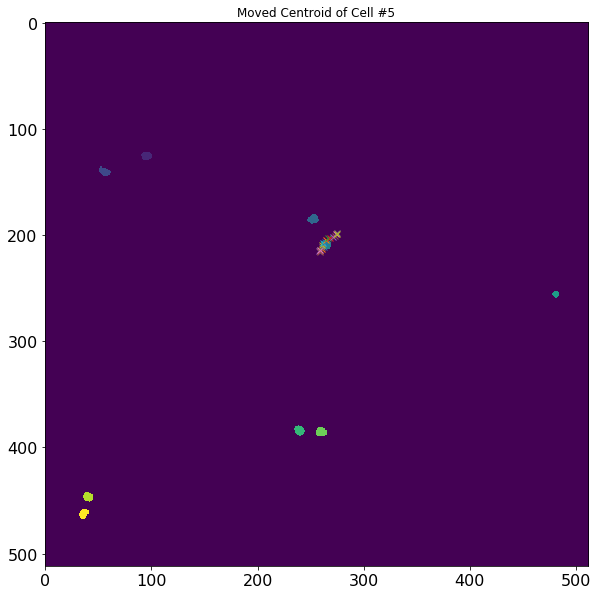

In [172]:
import matplotlib.pyplot as plt

num_frames = len(list(vid.iter_frames()))
cell_position = np.zeros((num_frames, 2))
last_centroid = np.zeros((1, 2))

for frame_num, frame in enumerate(vid.iter_frames()): 
    
    # preprocessing and cell labeling
    img = frame[:,:,0]
    processed = preprocessing(img)
    [props, cell_labels] = info_extraction(processed)

    # decide the centroid of cell#5 in the first frame
    if frame_num==0:
        cell_position[frame_num,:] = props[3].centroid
        plt.imshow(cell_labels) 
        plt.rcParams["figure.figsize"] = (10,10)
    #decide the centroid of cell#5 in current frame (nearest to the one in the prvious frame)
    else:
        last_centroid[0,:] = cell_position[frame_num-1,:]
        current_centroid = track_centroid(last_centroid, props)  
        cell_position[frame_num,:] = current_centroid
        
        plt.plot(cell_position[frame_num,1],cell_position[frame_num,0], 'x')
        plt.title('Moved Centroid of Cell #5')

Text(0.5, 1.0, 'Cell Centroid Position: pixels')

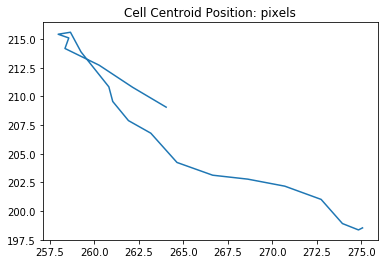

In [116]:
plt.plot(cell_position[:,1], cell_position[:,0])
plt.title('Cell Centroid Position: pixels')

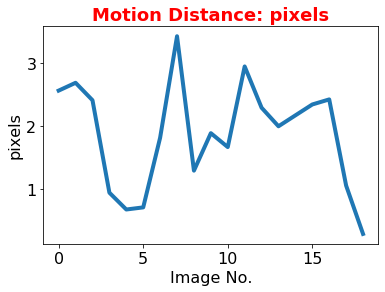

In [148]:
import math

frameNum = len(cell_position)
cell_distance = np.zeros(frameNum-1)

for nframe in range(0,frameNum-1):
    x1 = cell_position[nframe,0]
    y1 = cell_position[nframe,1]
    x2 = cell_position[nframe+1,0]
    y2 = cell_position[nframe+1,1]
    cell_distance[nframe]= math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )

plt.plot(cell_distance,linewidth=4.0)
plt.title('Motion Distance: pixels',fontsize=18,color='red', fontweight='bold')
plt.xlabel('Image No.',fontsize=16)
plt.ylabel('pixels',fontsize=16)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)